# Import Library



In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random as rd
import copy
import math

# Read Data

In [2]:
#import dataset
df_train = pd.read_csv('kendaraan_train.csv')
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


# Describe Data

In [3]:
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [4]:
#mengecek data null
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [5]:
#mengisi data null
df_train[['Jenis_Kelamin','SIM','Kode_Daerah','Sudah_Asuransi','Umur_Kendaraan',
          'Kendaraan_Rusak','Kanal_Penjualan','Tertarik']] = df_train[['Jenis_Kelamin','SIM','Kode_Daerah',
        'Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Kanal_Penjualan','Tertarik']].fillna(df_train.mode().iloc[0])
df_train[['Umur','Premi','Lama_Berlangganan']] = df_train[['Umur','Premi',
                                    'Lama_Berlangganan']].fillna(df_train[['Umur','Premi','Lama_Berlangganan']].mean())
df_train=df_train.set_index('id')

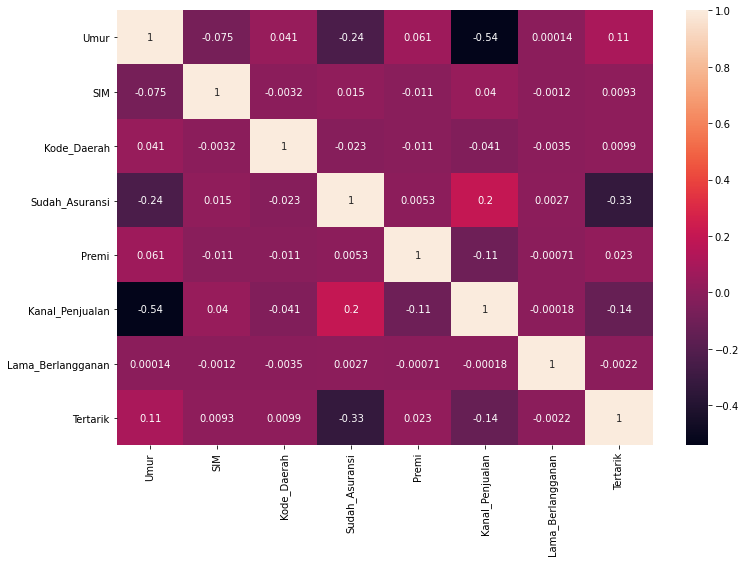

In [6]:
#melihat matrix korelasi
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True)

In [7]:
#merubah data 'Kendaraan_Rusak' dan 'Umur_Kendaraan' dari kategorikal menjadi numerikal
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace(['Pernah','Tidak'],[1,0])
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace(['< 1 Tahun','1-2 Tahun','> 2 Tahun'],[0,0.5,1])

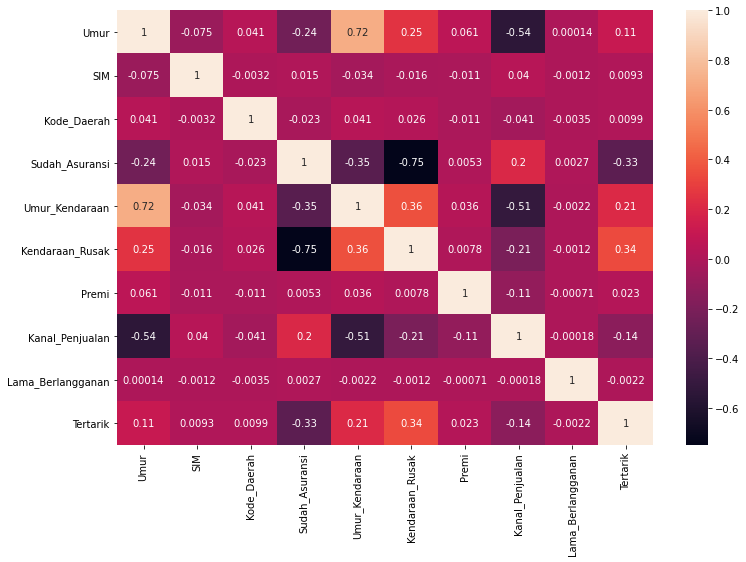

In [8]:
#melihat matrix korelasi setelah data diubah
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True)

In [9]:
#mengecek data null
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285831 entries, 1 to 285831
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  object 
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  float64
 6   Kendaraan_Rusak    285831 non-null  int64  
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 26.2+ MB


In [10]:
###Mengatasi Outlier
def handling_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    LB=q1 - (IQR * 1.5)
    UB=q3 + (IQR *1.5)
    dff = df[((df>LB) & (df<UB))]
    return dff

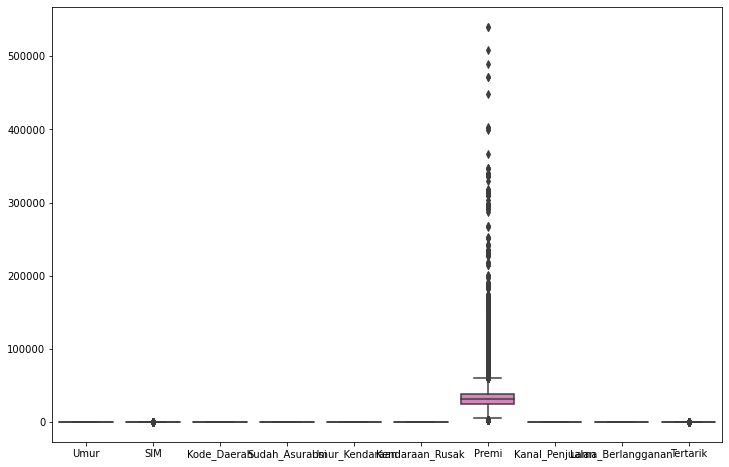

In [11]:
##boxplot sebelum handling outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=df_train)

In [12]:
#handling outliers
df_train['Premi'] = handling_outlier(df_train[['Premi']])
df_train.dropna(axis=0,inplace=True)

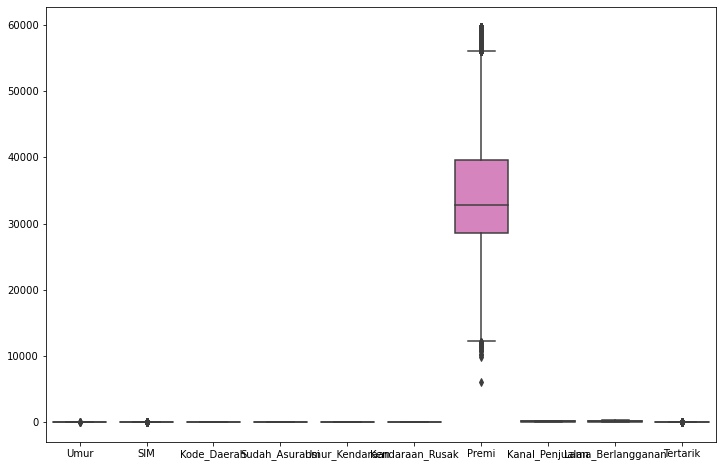

In [13]:
##boxplot setelah handling outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df_train)

In [14]:
#mengambil sample sebanyak 1000 data lalu memakai Standard Scaler sebagai scaler
df_train = df_train.sample(1000)
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_train[['Premi','Lama_Berlangganan']])
df_scaler

array([[ 2.27295147,  1.31442485],
       [-1.06719931,  0.86345492],
       [ 1.93765364, -0.10111966],
       ...,
       [-0.14896072,  0.60038912],
       [ 0.38837098,  1.063886  ],
       [-0.92775912, -0.81515538]])

In [15]:
class Kmeans:
    def __init__(self,X,K):
        ##menginilisialisasikan variabel untuk class
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        
    def kmeansss(self,X,K):
        ##proses kmeans
        
        #menentukan posisi awal centroid
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        
        #mencari jarak setiap data dengan centroid
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            #menghitung probabilitas dari setiap centroid...
            #...agar tidak berdekatan dengan centroid lain 
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #inisialisasi centroid secara acak
        self.Centroids=self.kmeansss(self.X,self.K)
        #menghitung jarak dengan eculidian distances dan memasukan n cluster
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            
            #update posisi centroid
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    def predict(self):
        return self.Output,self.Centroids.T

In [ ]:
##Menghitung best cluster menggunakan elbow method dengan WCSS
WCSS_array=np.array([])
n_iter=100
for K in range(1,11):
    kmeans=Kmeans(df_scaler,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)


In [ ]:
#within-cluster sums of squares (WCSS)
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.show()


In [ ]:
K = 5
kmeans=Kmeans(df_scaler,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

In [ ]:
color=['red','green','blue','yellow','violet']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.figure(figsize=(12,8))
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k],s=100, edgecolors='cyan')
plt.scatter(Centroids[:,0],Centroids[:,1],s=200,c='black',label='Centroids')
plt.xlabel('Lama Berlangganan')
plt.ylabel('Premi')
plt.legend()
plt.show()
